In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import savgol_filter 
from matplotlib import rcParams
import sys
import os
import csv
import warnings
import matplotlib.cbook

import peakutils
import pandas as pd


from voltammetry import core, fitting

data/20MM_2,7-AQDS_1M_H2SO4_50mVs_0.5step.DTA.txt Opened
1
2


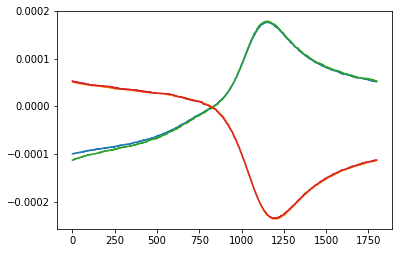

In [3]:


dict_1,n_cycle = core.read_file('data/20MM_2,7-AQDS_1M_H2SO4_50mVs_0.5step.DTA.txt')
for i in range(n_cycle):
        print(i+1)
        df = core.data_frame(dict_1, i+1)
        pot = df.Potential
        cur=df.Current
        pot1, pot2 = core.split(pot)
        cur1, cur2 = core.split(cur)

        #plt.plot(pot1,cur1)
        #plt.plot(pot2,cur2)
       
        df1= pd.DataFrame(cur1,pot1)
        df1.to_numpy()
        vector1 = df1.to_numpy()
        
        df2= pd.DataFrame(cur2,pot2)
        df2.to_numpy()
        vector2 = df2.to_numpy()
        
        plt.plot(vector1)
        plt.plot(vector2)
        
        
        vector1_cur1 = vector1[:,0]
        
        
        

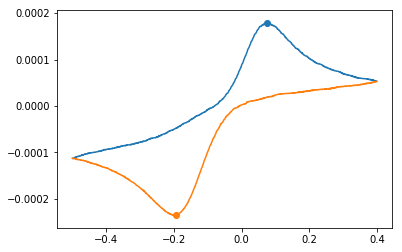

In [4]:
peak_pt1, peak_pot1, peak_cur1 = fitting.peak_find(pot1,cur1)
peak_pt2, peak_pot2, peak_cur2 = fitting.peak_find(pot2,cur2)
plt.plot(pot1,cur1)
plt.plot(pot2,cur2)
plt.scatter(peak_pot1,peak_cur1)
plt.scatter(peak_pot2,peak_cur2)

1040


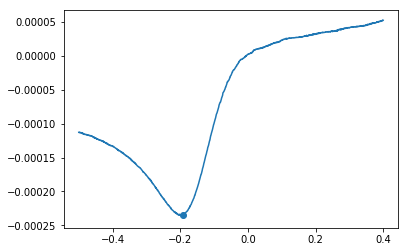

In [4]:
sm_cur = savgol_filter(cur2, 21, 5, mode='nearest')
der_1 = np.diff(sm_cur)
max_der = max(der_1)
min_der = min(der_1)
max_der_pt =  np.argmin(abs(der_1 - max_der))
min_der_pt =  np.argmin(abs(der_1 - min_der))

    # Find 0 in the first derivative
peak_pt = np.argmin(abs(der_1[min_der_pt:max_der_pt] - 0))

peak_pot = pot2[peak_pt+min_der_pt]
peak_cur = cur2[peak_pt+min_der_pt]
plt.plot(pot2,cur2)
plt.scatter(peak_pot,peak_cur)
print(min_der_pt)

array([-8.49156549e-08, -7.76131246e-08, -6.95667500e-08, -4.08297552e-08,
       -1.24972018e-07, -8.85641171e-08, -1.34383563e-07, -1.26183061e-07,
       -1.04326576e-07, -1.24991059e-07, -1.05982959e-07, -9.78053139e-08,
       -3.74641405e-08, -4.48318489e-08, -3.87450251e-08, -9.00823837e-09,
        1.92582482e-08, -1.25787894e-07, -8.17460177e-08, -7.29157260e-08,
       -1.73220269e-07, -1.15976568e-07, -1.12532812e-07, -7.00922208e-08,
       -1.27871206e-07, -2.94101302e-08, -1.22488345e-07, -6.49474296e-08,
       -4.14184166e-08, -6.11401615e-08, -2.85688437e-08, -2.78940146e-08,
       -4.28766802e-10, -1.70460654e-08, -2.75290933e-08, -2.71586301e-08,
       -7.11852655e-08, -1.54607460e-07, -1.20017323e-07, -1.69382194e-07,
       -2.02995113e-07, -1.04076847e-07, -1.25849644e-07, -1.28501198e-07,
       -9.54067285e-08, -2.37381713e-08, -7.42256216e-09,  3.00909582e-08,
        3.68139150e-08, -1.70570044e-08,  1.39670331e-08, -2.70052112e-09,
       -5.37573925e-08, -

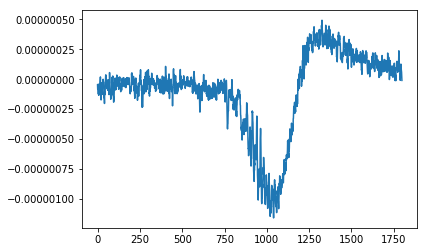

In [4]:
sm_cur = savgol_filter(cur2, 21, 5, mode='nearest')
    
der_1 = np.diff(sm_cur)
plt.plot(der_1)

a = max(der_1)
der_1[1:100]

In [5]:
sm_cur1 = savgol_filter(vector1_cur1, 21, 3, mode='nearest')

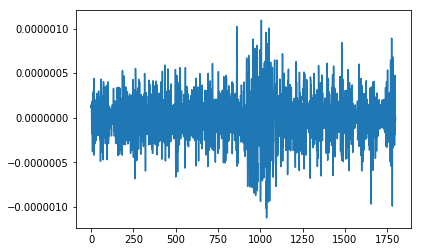

In [6]:
plt.plot(sm_cur1-cur1)

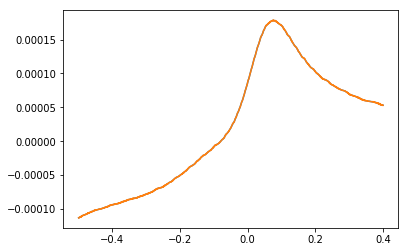

In [6]:
plt.plot(pot1, sm_cur1)
plt.plot(pot1, cur1)

In [7]:
der_1 = np.diff(sm_cur1)

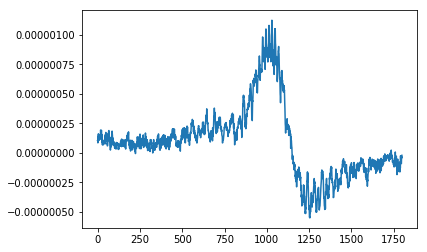

In [8]:
plt.plot(der_1)

In [9]:
peak_pt1 = np.argmin(abs(der_1 - 0))

peak_pot1 = pot1[peak_pt1]
peak_cur1 = cur1[peak_pt1]
print(peak_pt1, peak_pot1, peak_cur1)

1149 0.0750089 0.000177909


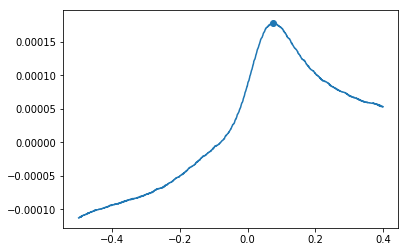

In [10]:
plt.plot(pot1,cur1)
plt.scatter(peak_pot1,peak_cur1)